# HELP NGO DATA CLUSTERING

As per the business objective of the case study, 'HELP' is a NGO organisation which collects funds from all over the world and then distributes to poor and needy countries. So in this process, NGO wants to find out the countries (from the available data) who are in direst need of money or essentials for their survival.

The steps involved in Clustering are broadly:

1) Read and understand the data

2) Clean the data

3) Prepare the data for modelling

4) Modelling

5) Final analysis 

## 1. Read and Visualize the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt, mpld3
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#read the dataset

help_df=pd.read_csv(r"C:\Users\MahaGaNapathi\Downloads\LIVE\HELP-NGO-Clustering\Country-data.csv",header=0)
help_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
# basics of help_df dataset

help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2. Clean the Data

In [4]:
# Let us calculate the percentage of missing values 
round(100*(help_df.isnull().sum())/len(help_df),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

It seems like 'help_df' dataframe doesnot have null values.

#### Checking whether the variables contains negative values from minimum to maximum values

In [5]:
help_df.child_mort.describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

In [6]:
help_df.exports.describe()

count    167.000000
mean      41.108976
std       27.412010
min        0.109000
25%       23.800000
50%       35.000000
75%       51.350000
max      200.000000
Name: exports, dtype: float64

In [7]:
help_df.health.describe()

count    167.000000
mean       6.815689
std        2.746837
min        1.810000
25%        4.920000
50%        6.320000
75%        8.600000
max       17.900000
Name: health, dtype: float64

In [8]:
help_df.imports.describe()

count    167.000000
mean      46.890215
std       24.209589
min        0.065900
25%       30.200000
50%       43.300000
75%       58.750000
max      174.000000
Name: imports, dtype: float64

In [9]:
help_df.income.describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

In [10]:
help_df.inflation.describe()

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

In [11]:
help_df.life_expec.describe()

count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
max       82.800000
Name: life_expec, dtype: float64

In [12]:
help_df.total_fer.describe()

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

In [13]:
help_df.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

### Univariate Analysis

In [14]:
help_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

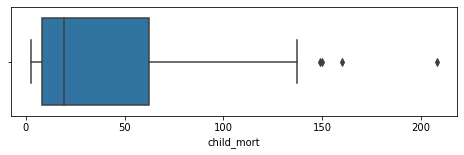

In [15]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.child_mort)
plt.show()

In many countries, Child mortality rate is typically 25 whereas the highest is 140. There are also countries having child mortality rate greater than or equal to 150. 

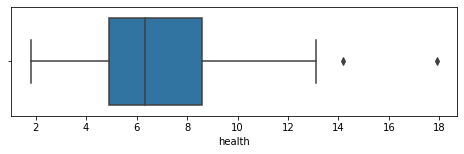

In [16]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.health)
plt.show()

Many countries most commonly contributes a health budget of 6.5% on toal budget. There are also countries which spends between than 14% to 18%. 

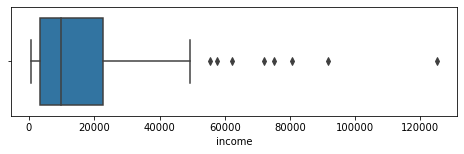

In [17]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.income)
plt.show()

There are countries in which a common person's salary is between 15000-20000 whereas there are many people of few countries earning more than 55000. 

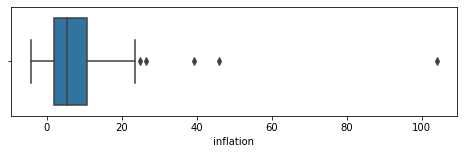

In [18]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.inflation)
plt.show()

High inflation, may result in less quality of life. This high inflation leads to poverty.

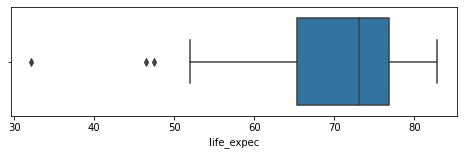

In [19]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.life_expec)
plt.show()

Less than 35 years, people die in some countries due to inflation or insufficient medical facilities provided by the government. But most of the people live between 65 years and 78 years.

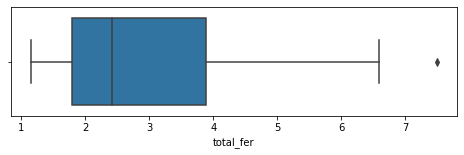

In [20]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.total_fer)
plt.show()

Total fertility rate in nations are bewteen 1.8% to 3.8% which is good but citizens are not getting proper aid from the countries to live healthy life.

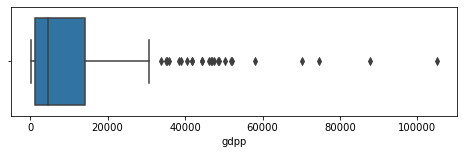

In [21]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.gdpp)
plt.show()

There are countries having GDP between 30000 to 100000, but it does not mean that there is no poverty in those countries. But, we (NGO) have to distribute funds to those countries whose gdp is below 18000.

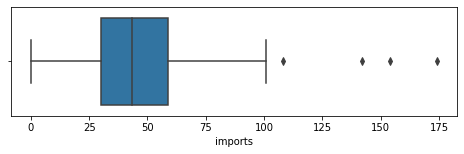

In [22]:
plt.figure(figsize=[8,2])
sns.boxplot(help_df.imports)
plt.show()

High imports high-fi life, so the countries which imports between 100 and 175.

In [23]:
help_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Bivariate analysis

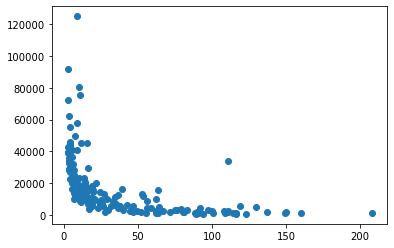

In [24]:
plt.scatter(help_df.child_mort,help_df.income)

People having less than 40000 salary, are experiencing highest child deaths before 100.

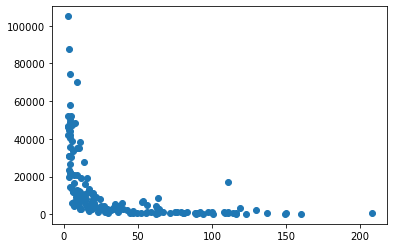

In [25]:
plt.scatter(help_df.child_mort,help_df.gdpp)

Countries having Low GDP, that is  having below 40000 are facing child mortality heavily.

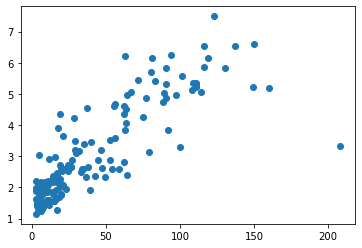

In [26]:
plt.scatter(help_df.child_mort,help_df.total_fer)

It seems to be linear relationship between the child mortality and total fertility. That means child mortality is increasing as total fertility is increasing. 

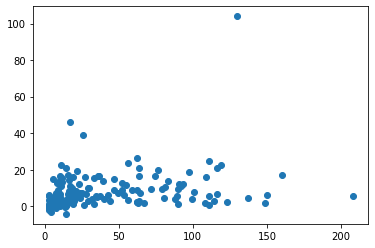

In [27]:
plt.scatter(help_df.child_mort,help_df.inflation)

Less inflation, more child mortality leads to countries unable to stop the child deaths due to some reason like malnutrition etc. There are inefficient countries, who are unable to govern poverty, even having inflation less than 35.

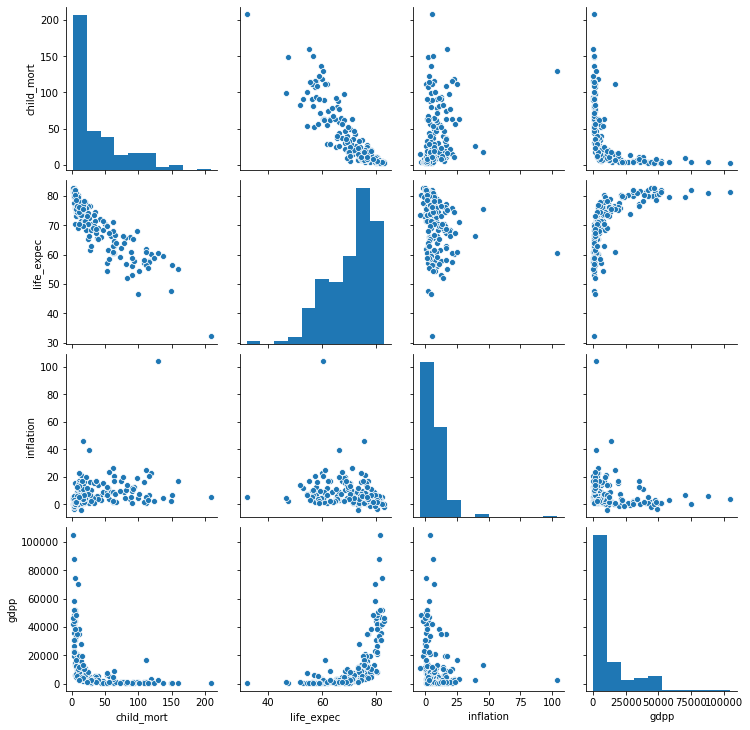

In [28]:
sns.pairplot(data=help_df, vars=['child_mort','life_expec', 'inflation','gdpp'])
plt.show()

In the above pairplot, if we consider few pairs, we get to know some information. 
In child_mort vs life_expec plot, we can clearly observe that there is a linear relationship. That means, if the expected life of bew born child decreases then there is also a increase in child mortality rate. 

In child_mort vs gdpp, we observe that, if gdp decreases, then child mortality rate increases.

In life_expec vs gdpp, we observe that, there is a direct proportional relation between gdp and life_expection. That is gdp increases then life expectation of child increases.

In gdpp vs inflation, we observe that, there is a very less inflation recorded as the gdp gets growing.

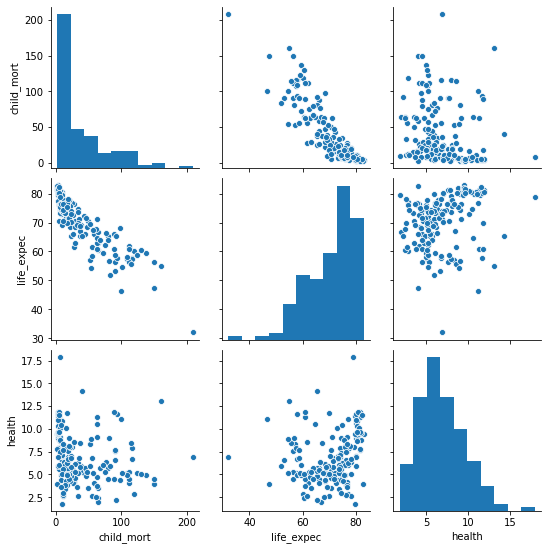

In [29]:
sns.pairplot(data=help_df, vars=['child_mort','life_expec', 'health'])
plt.show()

In child_mort vs health, we see there is random distribution of child deaths across countries. The countries spending less on health have more number of child deaths.

In life_expec vs health, we see there is increase in life growth of children as countries spends on health.

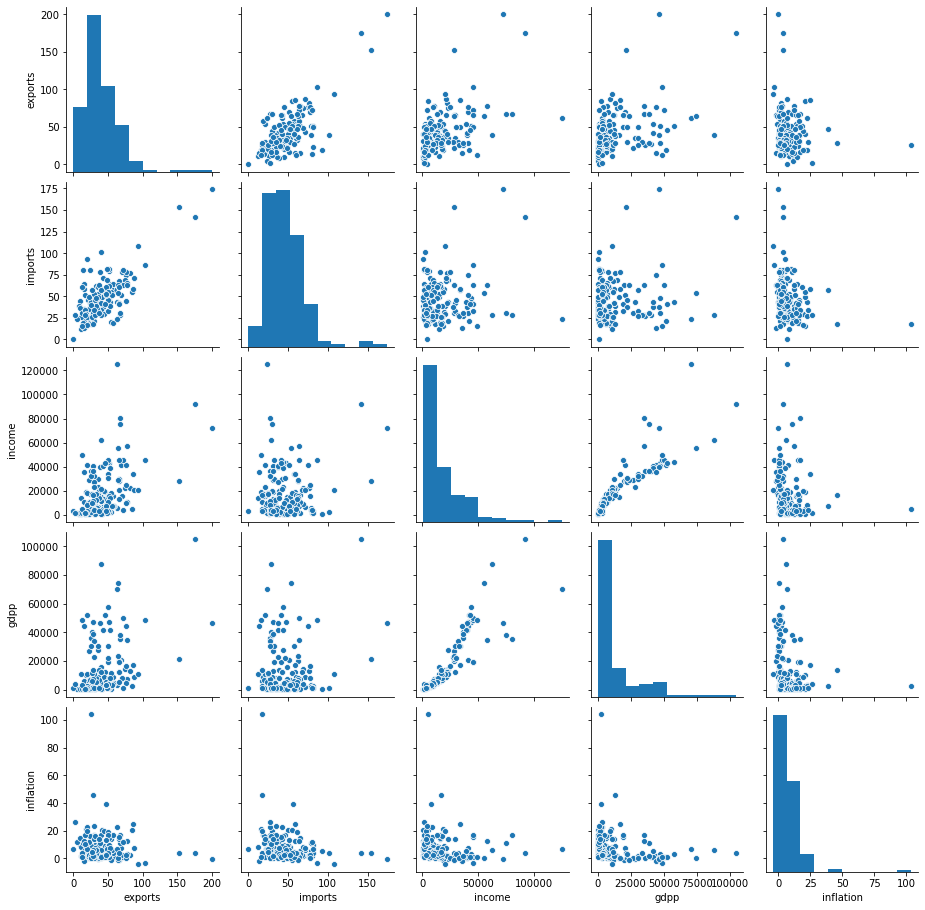

In [30]:
sns.pairplot(data=help_df, vars=['exports','imports', 'income','gdpp','inflation'])
plt.show()

In the above pairplot, if we see few pairs, we can draw some insights.

In gdpp vs income, there is linear relationship between gdp and income and it is a natural behaviour.

In exports vs imports, there is a linear relationship between exports and imports. As exports increase imports also increase.

### Correlation Matrix

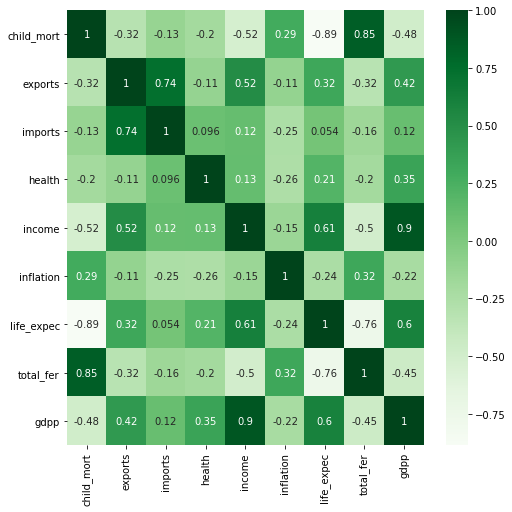

In [31]:
plt.figure(figsize=[8,8])
sns.heatmap(help_df[['child_mort','exports','imports','health','income','inflation',
                     'life_expec','total_fer','gdpp']].corr(),annot=True,cmap="Greens")
plt.show()

In the above heatmap, we see the correlation between the variables.

High Relationships
- child_mort and total_fer has 0.85

- gdpp and income has 0.90

- exports and imports has 0.74




Medium Relationships
- income and exports has 0.52

- life_expec and income has 0.61

- gdpp and life_expec has 0.60

- gdpp and exports has 0.42

## 3.Prepare the data for Modelling

Income_Rate(Income Rate): Income Capacity of an individual to buy product

Health_Status_Rate(Health Status Rate): The Country's budget on health or welfare

Child_Mortality_Rate(Child Deaths Rate): The rate of child death with respect to gdp and inflation of the country

Fertility_Rate(Fertility Rate): Fertility Rate of an individual

Trade_Rate(Trade Rate): Exports and Imports of a country

Life_Expec_Rate(Life Expectency Rate): Life expectency of Child with respect to gdp and inflation of the country

#### Feature Extraction

In [32]:
# new columns
help_df['Income_Rate']=(help_df['exports']/help_df['income'])*help_df['gdpp']

help_df['Income_Rate']=round(help_df['Income_Rate'],3)

In [33]:
help_df['Health_Status_Rate']=(help_df['health']/help_df['income'])*help_df['inflation']

help_df['Health_Status_Rate']=round(help_df['Health_Status_Rate'],2)

In [34]:
help_df['Child_Mortality_Rate']=(help_df['inflation']/help_df['gdpp'])*help_df['child_mort']

help_df['Child_Mortality_Rate']=round(help_df['Child_Mortality_Rate'],2)

In [35]:
help_df['Trade_Rate']=(help_df['imports']/help_df['exports'])*help_df['gdpp']

help_df['Trade_Rate']=round(help_df['Trade_Rate'],2)

In [36]:
help_df['Fertility_Rate']=(help_df['total_fer']/help_df['income'])*help_df['inflation']

help_df['Fertility_Rate']=round(help_df['Fertility_Rate'],2)

In [37]:
help_df['Life_Expec_Rate']=(help_df['life_expec']/help_df['gdpp'])*help_df['inflation']

help_df['Life_Expec_Rate']=round(help_df['Life_Expec_Rate'],2)

In [38]:
help_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Income_Rate  Health_Status_Rate  \
0       9.44        56.2       5.82    553        3.435                0.04   
1       4.49        76.3       1.65   4090       11.533                0.00   
2      16.10        76.5       2.89   4460       13.276                0.01   
3      22.40        60.1       6.16   3530       37.274                0.01   
4       1.44        76.8       2.13  12200       29.063                0.00   

   Child_Mortality_Rate  Trade_Rate  Fertility_Rate  Life_Expec_Rate  
0                  1.54     2482.97            0.03             0.96  
1                  0.02     7099.07            0.00             0.08  
2                  0.10     3646.98            0.00             0.28  
3                  0.76     2430.77            0.02             0.38  
4                  0.00    15792.97            0.00             0.01

In [39]:
# Let us consider the derived features from legacy features

help_calc_df=help_df[['Health_Status_Rate', 'Child_Mortality_Rate', 'Trade_Rate', 'Fertility_Rate',
                     'Life_Expec_Rate', 'Income_Rate']]

In [40]:
help_calc_df.head()

Health_Status_Rate  Child_Mortality_Rate  Trade_Rate  Fertility_Rate  \
0                0.04                  1.54     2482.97            0.03   
1                0.00                  0.02     7099.07            0.00   
2                0.01                  0.10     3646.98            0.00   
3                0.01                  0.76     2430.77            0.02   
4                0.00                  0.00    15792.97            0.00   

   Life_Expec_Rate  Income_Rate  
0             0.96        3.435  
1             0.08       11.533  
2             0.28       13.276  
3             0.38       37.274  
4             0.01       29.063

{'whiskers': [<matplotlib.lines.Line2D at 0x25839894730>,
 'caps': [<matplotlib.lines.Line2D at 0x258398933d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25839894370>],
 'medians': [<matplotlib.lines.Line2D at 0x25839893a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x25839893d90>],
 'means': []}

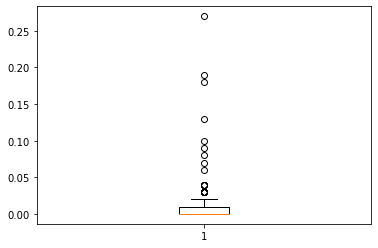

In [41]:
# 1. outlier treatment
plt.boxplot(help_calc_df['Health_Status_Rate'])

#### Removing (statistical) outliers

In [42]:
# outlier treatment for Health_Status_Rate

Q1 = help_calc_df.Health_Status_Rate.quantile(0.10)
Q3 = help_calc_df.Health_Status_Rate.quantile(0.90)
IQR = Q3 - Q1
help_calc_df = help_calc_df[(help_calc_df.Health_Status_Rate >= Q1 - 1.5*IQR) & (help_calc_df.Health_Status_Rate <= Q3 + 1.5*IQR)]

# outlier treatment for Child_Mortality_Rate
Q1 = help_calc_df.Child_Mortality_Rate.quantile(0.10)
Q3 = help_calc_df.Child_Mortality_Rate.quantile(0.90)
IQR = Q3 - Q1
help_calc_df = help_calc_df[(help_calc_df.Child_Mortality_Rate >= Q1 - 1.5*IQR) & (help_calc_df.Child_Mortality_Rate<= Q3 + 1.5*IQR)]

# outlier treatment for Trade_Rate
Q1 = help_calc_df.Trade_Rate.quantile(0.10)
Q3 = help_calc_df.Trade_Rate.quantile(0.90)
IQR = Q3 - Q1
help_calc_df = help_calc_df[(help_calc_df.Trade_Rate >= Q1 - 1.5*IQR) & (help_calc_df.Trade_Rate <= Q3 + 1.5*IQR)]

# outlier treatment for Fertility_Rate
Q1 = help_calc_df.Fertility_Rate.quantile(0.10)
Q3 = help_calc_df.Fertility_Rate.quantile(0.90)
IQR = Q3 - Q1
help_calc_df = help_calc_df[(help_calc_df.Fertility_Rate >= Q1 - 1.5*IQR) & (help_calc_df.Fertility_Rate <= Q3 + 1.5*IQR)]

# outlier treatment for Life_Expec_Rate
Q1 = help_calc_df.Life_Expec_Rate.quantile(0.10)
Q3 = help_calc_df.Life_Expec_Rate.quantile(0.90)
IQR = Q3 - Q1
help_calc_df = help_calc_df[(help_calc_df.Life_Expec_Rate >= Q1 - 1.5*IQR) & (help_calc_df.Life_Expec_Rate <= Q3 + 1.5*IQR)]

# outlier treatment for Income_Rate
Q1 = help_calc_df.Income_Rate.quantile(0.10)
Q3 = help_calc_df.Income_Rate.quantile(0.90)
IQR = Q3 - Q1
help_calc_df = help_calc_df[(help_calc_df.Income_Rate >= Q1 - 1.5*IQR) & (help_calc_df.Income_Rate <= Q3 + 1.5*IQR)]

In [43]:
#2. rescaling
fhcf_df = help_calc_df[['Health_Status_Rate', 'Child_Mortality_Rate', 'Trade_Rate', 'Fertility_Rate',
                     'Life_Expec_Rate', 'Income_Rate']]

#3. instantiate
scaler = StandardScaler()

#4. fit_transform
fhcf_df_scaled = scaler.fit_transform(fhcf_df)
fhcf_df_scaled.shape

fhcf_df_scaled = pd.DataFrame(fhcf_df_scaled)
fhcf_df_scaled.columns = ['Health_Status_Rate', 'Child_Mortality_Rate', 'Trade_Rate', 'Fertility_Rate',
                     'Life_Expec_Rate', 'Income_Rate']
fhcf_df_scaled.head()

Health_Status_Rate  Child_Mortality_Rate  Trade_Rate  Fertility_Rate  \
0            2.980443              3.313038   -0.670484        2.736859   
1           -0.621652             -0.490079   -0.359117       -0.485013   
2            0.278872             -0.289915   -0.591969       -0.485013   
3            0.278872              1.361439   -0.674005        1.662902   
4           -0.621652             -0.540120    0.227307       -0.485013   

   Life_Expec_Rate  Income_Rate  
0         2.446823    -1.164936  
1        -0.422635    -0.706351  
2         0.229515    -0.607646  
3         0.555589     0.751348  
4        -0.650887     0.286363

## 4. Modelling

## K-Means Clustering

In [44]:
# k-means with some arbitrary k
# kmeans = KMeans(n_clusters=4, max_iter=50)
# kmeans.fit(fhcf_df_scaled)

In [45]:
# kmeans.labels_

### Finding the Optimal Number of Clusters

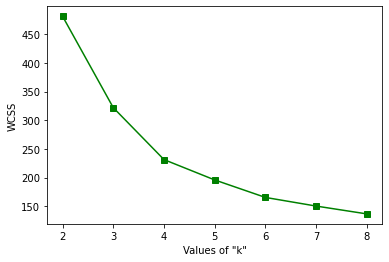

In [46]:
cluster_df = fhcf_df_scaled[['Health_Status_Rate', 'Child_Mortality_Rate', 'Trade_Rate', 'Fertility_Rate',
                     'Life_Expec_Rate', 'Income_Rate']].values

limit = int((cluster_df.shape[0]//2)**0.5)
 
# selecting optimal value of 'k' using elbow method
 
# wcss - within cluster sum of squared distances

wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(cluster_df)
    wcss[k] = model.inertia_
     
# plotting the wcss values to find out the elbow value

plt.plot(list(wcss.keys()),list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

From the above 'Elbow Curve', the optimal number of clusters are 4.

### Hopkins Statistics

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [48]:
def hopkins(X):
    d = X.shape[1]
    
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [49]:
H=hopkins(fhcf_df_scaled)

In [50]:
print(H)

0.8405276596396025


### Silhouette Analysis

In [51]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(fhcf_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(fhcf_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
 

For n_clusters=2, the silhouette score is 0.5149169895880381
For n_clusters=3, the silhouette score is 0.42928653542606615
For n_clusters=4, the silhouette score is 0.4319350217309425
For n_clusters=5, the silhouette score is 0.41227861596043336
For n_clusters=6, the silhouette score is 0.3550867811168233
For n_clusters=7, the silhouette score is 0.3443016577316569
For n_clusters=8, the silhouette score is 0.33535076221086163


In [52]:
fhcf_df_scaled.shape

(155, 6)

In [53]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(fhcf_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [54]:
kmeans.labels_

array([0, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 3, 1, 2, 0, 2, 1, 1, 3, 1, 3, 1, 2,
       3, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1,
       0, 1, 1, 3, 0, 1, 1, 3, 3, 1, 1, 0, 1, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 3, 1, 0,
       1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 3, 1, 1, 3, 0,
       3])

In [55]:
# assign the label
fhcf_df['cluster_id'] = kmeans.labels_
fhcf_df.head()

Health_Status_Rate  Child_Mortality_Rate  Trade_Rate  Fertility_Rate  \
0                0.04                  1.54     2482.97            0.03   
1                0.00                  0.02     7099.07            0.00   
2                0.01                  0.10     3646.98            0.00   
3                0.01                  0.76     2430.77            0.02   
4                0.00                  0.00    15792.97            0.00   

   Life_Expec_Rate  Income_Rate  cluster_id  
0             0.96        3.435           0  
1             0.08       11.533           1  
2             0.28       13.276           1  
3             0.38       37.274           3  
4             0.01       29.063           1

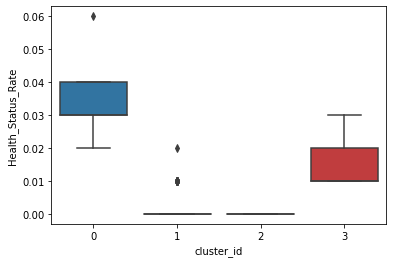

In [56]:
# plot
sns.boxplot(x='cluster_id', y='Health_Status_Rate', data=fhcf_df)

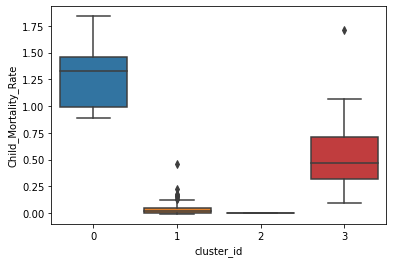

In [57]:
sns.boxplot(x='cluster_id', y='Child_Mortality_Rate', data=fhcf_df)

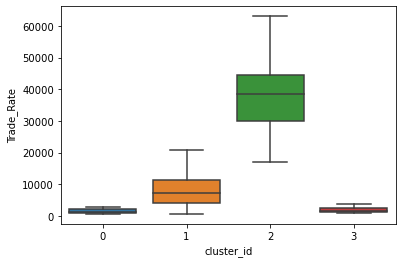

In [58]:
sns.boxplot(x='cluster_id', y='Trade_Rate', data=fhcf_df)

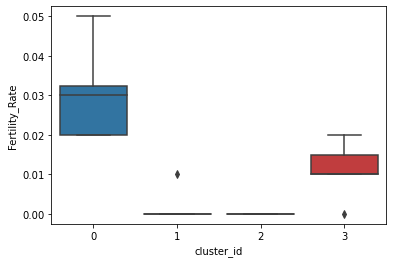

In [59]:
sns.boxplot(x='cluster_id', y='Fertility_Rate', data=fhcf_df)

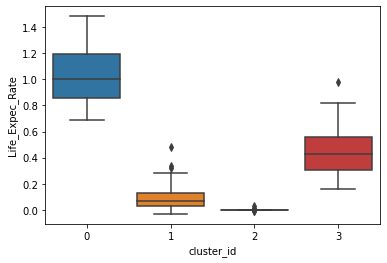

In [60]:
sns.boxplot(x='cluster_id', y='Life_Expec_Rate', data=fhcf_df)

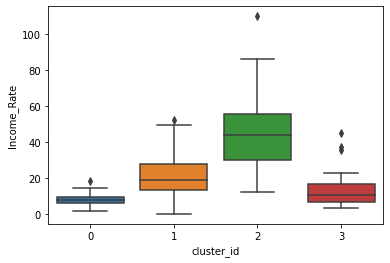

In [61]:
sns.boxplot(x='cluster_id', y='Income_Rate', data=fhcf_df)

## Hierarchical Clustering

In [62]:
fhcf_df_scaled.head()

Health_Status_Rate  Child_Mortality_Rate  Trade_Rate  Fertility_Rate  \
0            2.980443              3.313038   -0.670484        2.736859   
1           -0.621652             -0.490079   -0.359117       -0.485013   
2            0.278872             -0.289915   -0.591969       -0.485013   
3            0.278872              1.361439   -0.674005        1.662902   
4           -0.621652             -0.540120    0.227307       -0.485013   

   Life_Expec_Rate  Income_Rate  
0         2.446823    -1.164936  
1        -0.422635    -0.706351  
2         0.229515    -0.607646  
3         0.555589     0.751348  
4        -0.650887     0.286363

In [63]:
fhcf_hier_df = fhcf_df[['Health_Status_Rate', 'Child_Mortality_Rate', 'Trade_Rate', 'Fertility_Rate',
                     'Life_Expec_Rate', 'Income_Rate']]

In [64]:
fhcf_hier_df.head()

Health_Status_Rate  Child_Mortality_Rate  Trade_Rate  Fertility_Rate  \
0                0.04                  1.54     2482.97            0.03   
1                0.00                  0.02     7099.07            0.00   
2                0.01                  0.10     3646.98            0.00   
3                0.01                  0.76     2430.77            0.02   
4                0.00                  0.00    15792.97            0.00   

   Life_Expec_Rate  Income_Rate  
0             0.96        3.435  
1             0.08       11.533  
2             0.28       13.276  
3             0.38       37.274  
4             0.01       29.063

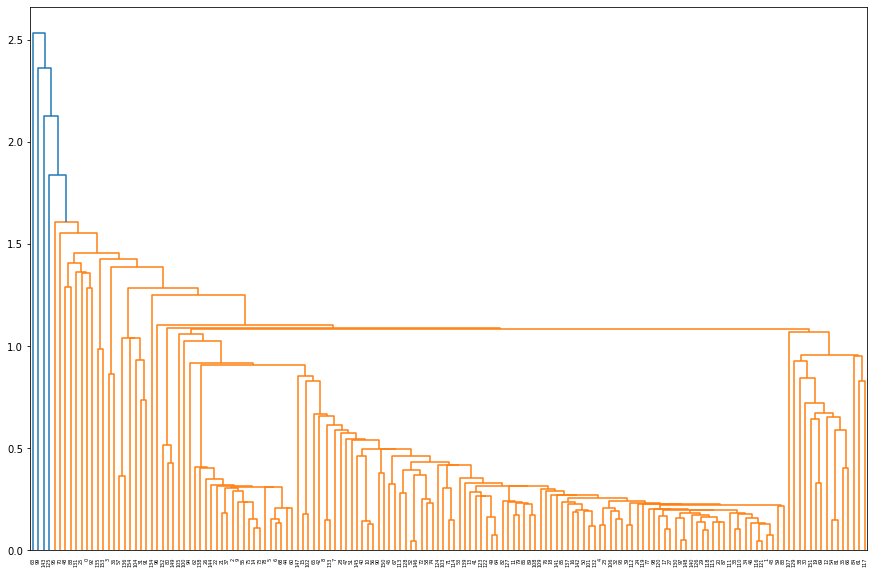

In [65]:
# single linkage
plt.figure(figsize=[15,10])
mergings = linkage(fhcf_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

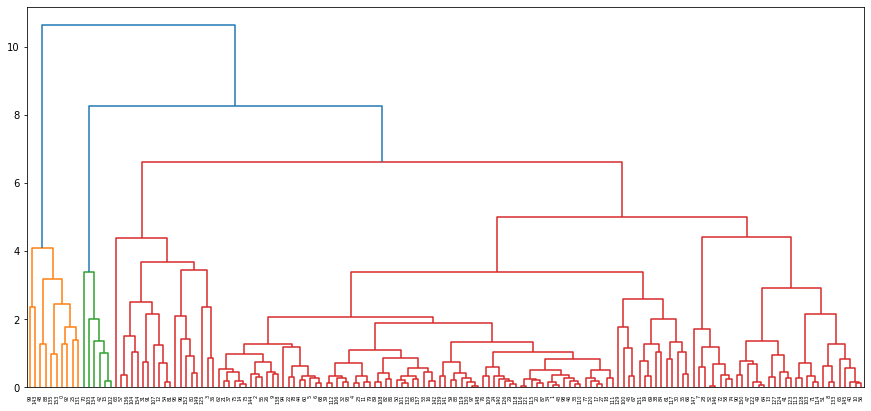

In [66]:
# complete linkage
plt.figure(figsize=[15,7])
mergings = linkage(fhcf_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [67]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 3, 1, 2, 3, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 3, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0,
       2])

In [68]:
# assign cluster labels
fhcf_hier_df['cluster_labels'] = cluster_labels
fhcf_hier_df.head()

Health_Status_Rate  Child_Mortality_Rate  Trade_Rate  Fertility_Rate  \
0                0.04                  1.54     2482.97            0.03   
1                0.00                  0.02     7099.07            0.00   
2                0.01                  0.10     3646.98            0.00   
3                0.01                  0.76     2430.77            0.02   
4                0.00                  0.00    15792.97            0.00   

   Life_Expec_Rate  Income_Rate  cluster_labels  
0             0.96        3.435               0  
1             0.08       11.533               1  
2             0.28       13.276               1  
3             0.38       37.274               2  
4             0.01       29.063               1

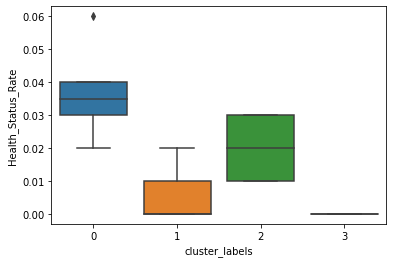

In [69]:
# plots
sns.boxplot(x='cluster_labels', y='Health_Status_Rate', data=fhcf_hier_df)

Countries having health budget are either limited to clusters 0 , 1 or cluster 3. We can see countries with expenditure on health falls mainly on clusters 0, 1 and 3. There are no countries who can contribute on health in cluster 2. But there are many countries who have large health budget.

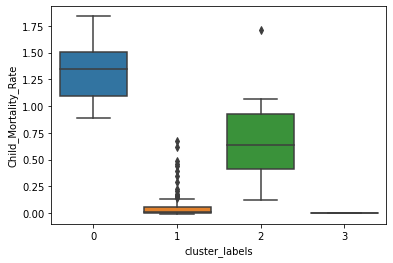

In [70]:
sns.boxplot(x='cluster_labels', y='Child_Mortality_Rate', data=fhcf_hier_df)

Countries having child mortality on cluster 0, 1 and 3 are having large number of mortality rate. Mortality rate metric is not applicable for cluster 2 countries because there are no child deaths (almost nothing compared to other cluster countries)

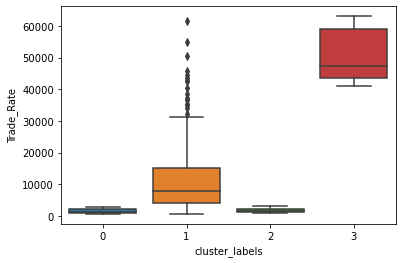

In [71]:
sns.boxplot(x='cluster_labels', y='Trade_Rate', data=fhcf_hier_df)

Cluster 2 is having great Trade Rate like imports and exports, that they come under 'Developed Nations' Category, where as the countries under 'Developing Nations' category are on Cluster 1. Countries on cluster 0 are poor countries.

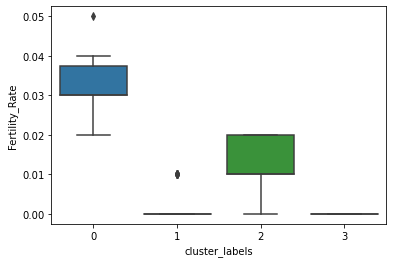

In [72]:
sns.boxplot(x='cluster_labels', y='Fertility_Rate', data=fhcf_hier_df)

Surprisingly, countries in cluster 0 and 3 are having high fertility rate when compared cluster 1 and 2. 

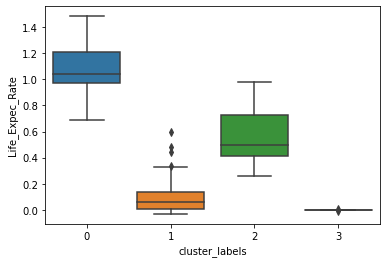

In [73]:
sns.boxplot(x='cluster_labels', y='Life_Expec_Rate', data=fhcf_hier_df)

Children in Cluster 0 and 1 countries have high life expectancy rate, whereas countries in cluster 2 they dont have life expectancy rate either 0 or doesn't comes under life expectancy metrics. 

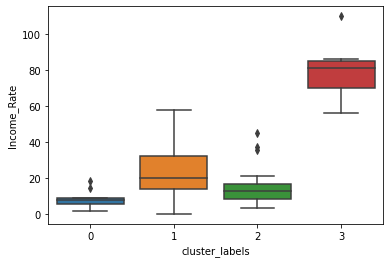

In [74]:
sns.boxplot(x='cluster_labels', y='Income_Rate', data=fhcf_hier_df)

We can clearly see that there income rate is higher in cluster 2 than cluster 1. Whereas, cluster 0 has very less income rate.

## Conclusion

Optimal number of Clusters of Hierarchical Clustering resulted would be suitable for the business objective representation. 

In [75]:
fhcf_hier_df['Country']=help_df['country']

Let us analyse the behaviour of the calculated variables to draw useful insights by plotting scatter plots. 

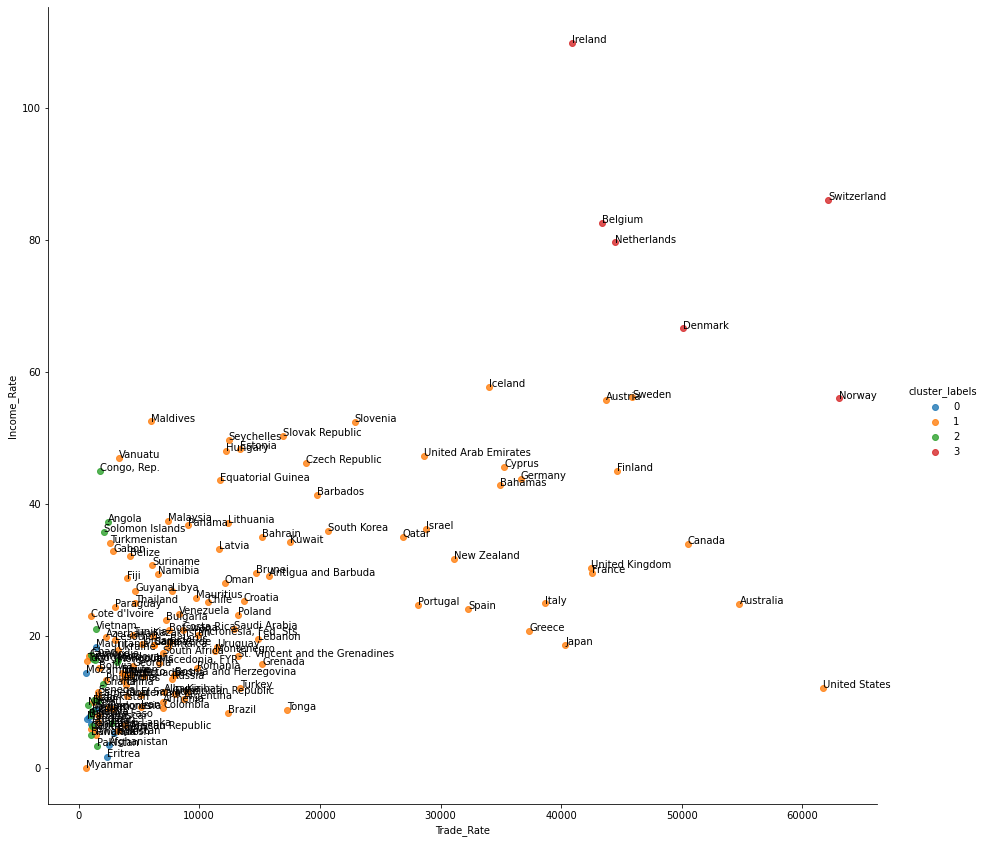

In [76]:
e=sns.lmplot(data=fhcf_hier_df, x='Trade_Rate', y='Income_Rate', hue='cluster_labels', 
                   fit_reg=False, legend=True, legend_out=True, height=5,aspect=2)

e.fig.set_size_inches(14,13)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(fhcf_hier_df.Trade_Rate, fhcf_hier_df.Income_Rate, fhcf_hier_df.Country, plt.gca())  

In Income_Rate vs Trade_Rate, we clearly see that the countries like United States, United Kingdom, Canada, Australia etc., countries have very high Trade rate along with Income rate. There is no need for a NGO to look in to these countries because they (countries) are well eligible to have a range of comfort-luxurious life.

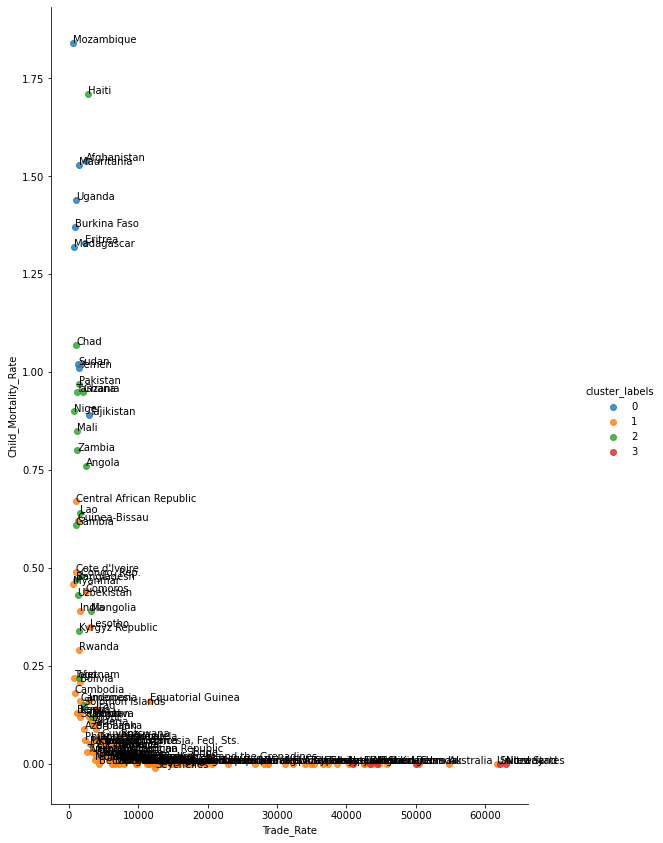

In [77]:
d=sns.lmplot(data=fhcf_hier_df, x='Trade_Rate', y='Child_Mortality_Rate', hue='cluster_labels', 
                   height=5,fit_reg=False, legend=True, legend_out=True)

d.fig.set_size_inches(10,13)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(fhcf_hier_df.Trade_Rate, fhcf_hier_df.Child_Mortality_Rate, fhcf_hier_df.Country, plt.gca())  

In Child_Mortality_Rate vs Trade_Rate, we clearly see that the countries like Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia etc., countries have high child death rate without any proper Trade rate. No Trade Rate, means neither they have capacity to import nor to export. These countries badly need  funds for their survival. If NGOs support these countries they can save children. So NGO should focus on countries like Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia etc. which are looking for help.

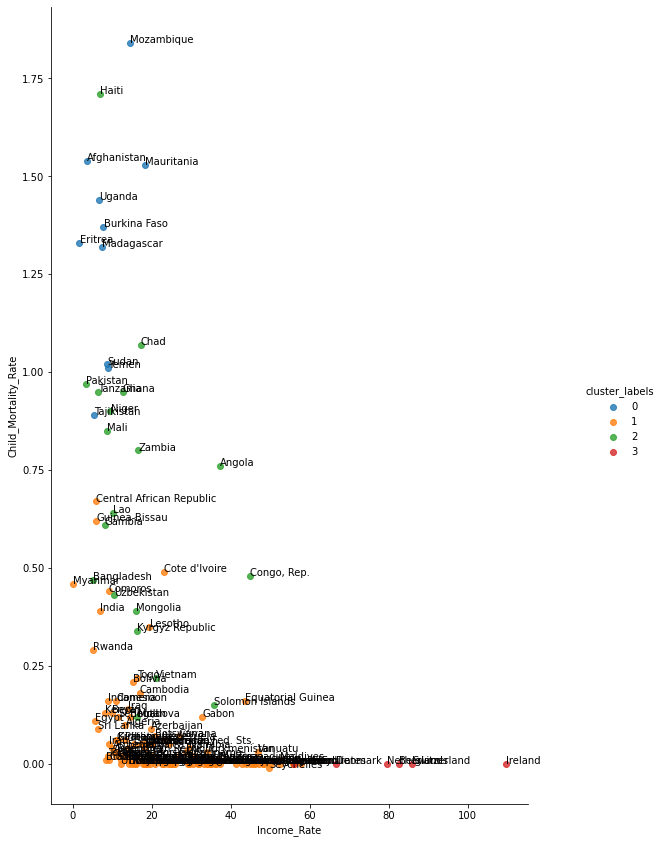

In [78]:
f=sns.lmplot(data=fhcf_hier_df, x='Income_Rate', y='Child_Mortality_Rate', hue='cluster_labels', 
                   fit_reg=False, legend=True, legend_out=True)


f.fig.set_size_inches(10,13)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(fhcf_hier_df.Income_Rate, fhcf_hier_df.Child_Mortality_Rate, fhcf_hier_df.Country, plt.gca())  

In Child_Mortality_Rate vs Income_Rate, we clearly see that the countries like Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia, Uganda etc., countries have high child death rate along with very low income rate. These countries are also suffering from very less capability of buying most essential needs. If NGOs support these countries they can save children. So NGO should focus on countries like Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia etc. which are looking for help.

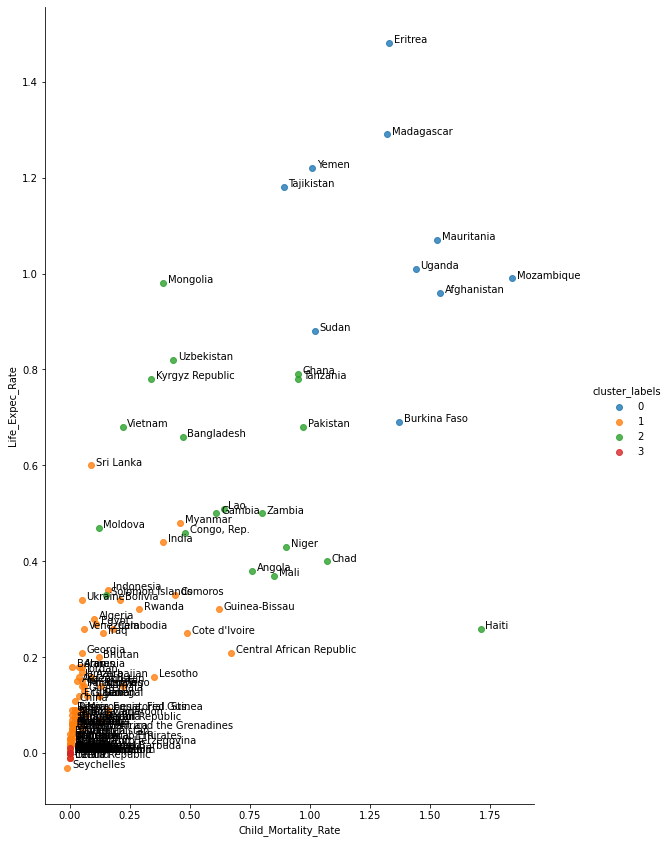

In [79]:
g=sns.lmplot(data=fhcf_hier_df, x='Child_Mortality_Rate',y='Life_Expec_Rate', hue='cluster_labels', 
                   fit_reg=False, legend=True, legend_out=True)

g.fig.set_size_inches(10,13)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(fhcf_hier_df.Child_Mortality_Rate, fhcf_hier_df.Life_Expec_Rate, fhcf_hier_df.Country, plt.gca())  

In Child_Mortality_Rate vs Life_Expec_Rate, we clearly see that the countries like Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia etc., countries have high life expectency rate along with Child mortality rate. If NGOs support these countries they can save children. So NGO should focus on countries like Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia etc. which are looking for help.

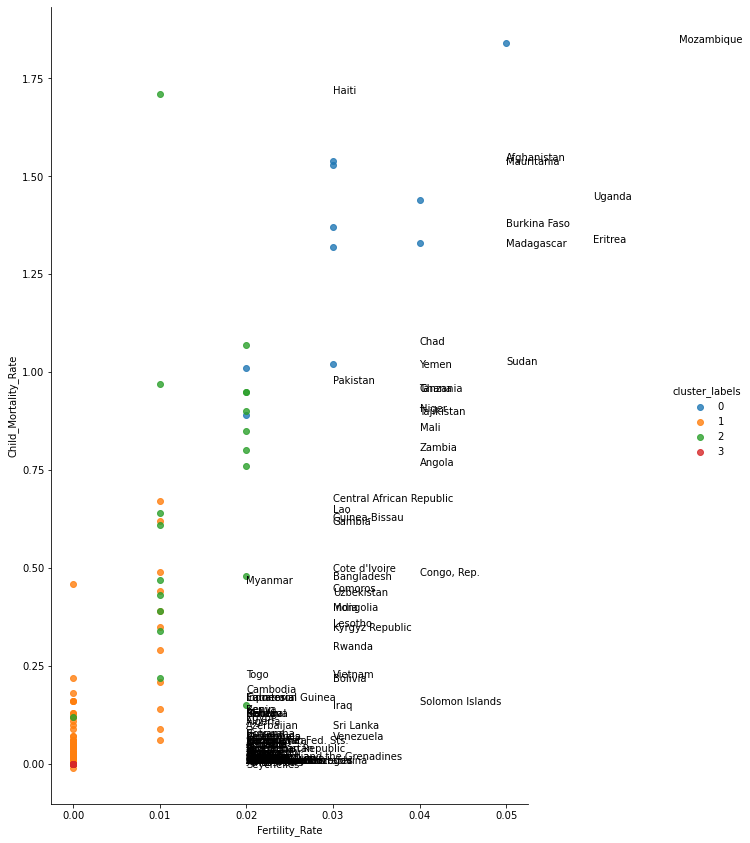

In [80]:
h=sns.lmplot(data=fhcf_hier_df, x='Fertility_Rate',y='Child_Mortality_Rate', hue='cluster_labels', 
                   fit_reg=False, legend=True, legend_out=True)

h.fig.set_size_inches(10,13)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(fhcf_hier_df.Fertility_Rate, fhcf_hier_df.Child_Mortality_Rate, fhcf_hier_df.Country, plt.gca())  


In Child_Mortality_Rate vs Fertility_Rate, we clearly see that the countries like Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia etc., countries have high fertility rate along with Child mortality rate. So NGO should focus on countries like  Guinea, Malawi, Mozambique, Afghanistan, Mauritania, Liberia etc. which are looking for help.

In [81]:
refuge=pd.DataFrame({'Fertility_Rate':fhcf_hier_df.Fertility_Rate,
                    'Child_Mortality_Rate':fhcf_hier_df.Child_Mortality_Rate,
                    'country':fhcf_hier_df.Country})

In [82]:
refuge.shape

(155, 3)

In [83]:
# Sorting the Dataframe according to 'Fertility_Rate' and 'Child_Mortality_Rate'
# Lesser the 'Fertility_Rate' and 'Child_Mortality_Rate' more the help needed by the country

refuge=refuge.sort_values(by=['Fertility_Rate','Child_Mortality_Rate'],ascending=False)

In [84]:
refuge.head(10)

Fertility_Rate  Child_Mortality_Rate       country
106            0.05                  1.84    Mozambique
155            0.04                  1.44        Uganda
50             0.04                  1.33       Eritrea
0              0.03                  1.54   Afghanistan
99             0.03                  1.53    Mauritania
25             0.03                  1.37  Burkina Faso
93             0.03                  1.32    Madagascar
142            0.03                  1.02         Sudan
32             0.02                  1.07          Chad
165            0.02                  1.01         Yemen

In [85]:
latlong=pd.read_csv(r'world_country_latitude_and_longitude_values.csv')

In [86]:
latlong.columns

Index(['country_code', 'latitude', 'longitude', 'country', 'usa_state_code',
       'usa_state_latitude', 'usa_state_longitude', 'usa_state'],
      dtype='object')

In [87]:
latlong=latlong[['latitude', 'longitude', 'country']]

In [88]:
latlong.head()

latitude  longitude               country
0  42.546245   1.601554               Andorra
1  23.424076  53.847818  United Arab Emirates
2  33.939110  67.709953           Afghanistan
3  17.060816 -61.796428   Antigua and Barbuda
4  18.220554 -63.068615              Anguilla

In [89]:
ref_cord=pd.merge(refuge,latlong,on='country')

In [90]:
ref_cord.head(10)

Fertility_Rate  Child_Mortality_Rate       country   latitude  longitude
0            0.05                  1.84    Mozambique -18.665695  35.529562
1            0.04                  1.44        Uganda   1.373333  32.290275
2            0.04                  1.33       Eritrea  15.179384  39.782334
3            0.03                  1.54   Afghanistan  33.939110  67.709953
4            0.03                  1.53    Mauritania  21.007890 -10.940835
5            0.03                  1.37  Burkina Faso  12.238333  -1.561593
6            0.03                  1.32    Madagascar -18.766947  46.869107
7            0.03                  1.02         Sudan  12.862807  30.217636
8            0.02                  1.07          Chad  15.454166  18.732207
9            0.02                  1.01         Yemen  15.552727  48.516388

In [91]:
choro_ref=ref_cord.head(10)

In [92]:
ref_cord.isna().sum()

Fertility_Rate          0
Child_Mortality_Rate    0
country                 0
latitude                0
longitude               0
dtype: int64

In [93]:
need_ref_cord_all=ref_cord[['country','latitude','longitude','Fertility_Rate','Child_Mortality_Rate']]

In [94]:
need_ref_cord=need_ref_cord_all.head(10)

In [95]:
need_ref_cord

country   latitude  longitude  Fertility_Rate  Child_Mortality_Rate
0    Mozambique -18.665695  35.529562            0.05                  1.84
1        Uganda   1.373333  32.290275            0.04                  1.44
2       Eritrea  15.179384  39.782334            0.04                  1.33
3   Afghanistan  33.939110  67.709953            0.03                  1.54
4    Mauritania  21.007890 -10.940835            0.03                  1.53
5  Burkina Faso  12.238333  -1.561593            0.03                  1.37
6    Madagascar -18.766947  46.869107            0.03                  1.32
7         Sudan  12.862807  30.217636            0.03                  1.02
8          Chad  15.454166  18.732207            0.02                  1.07
9         Yemen  15.552727  48.516388            0.02                  1.01

In [96]:
need_ref_cord.country.to_list()

['Mozambique',
 'Uganda',
 'Eritrea',
 'Afghanistan',
 'Mauritania',
 'Burkina Faso',
 'Madagascar',
 'Sudan',
 'Chad',
 'Yemen']

In [97]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

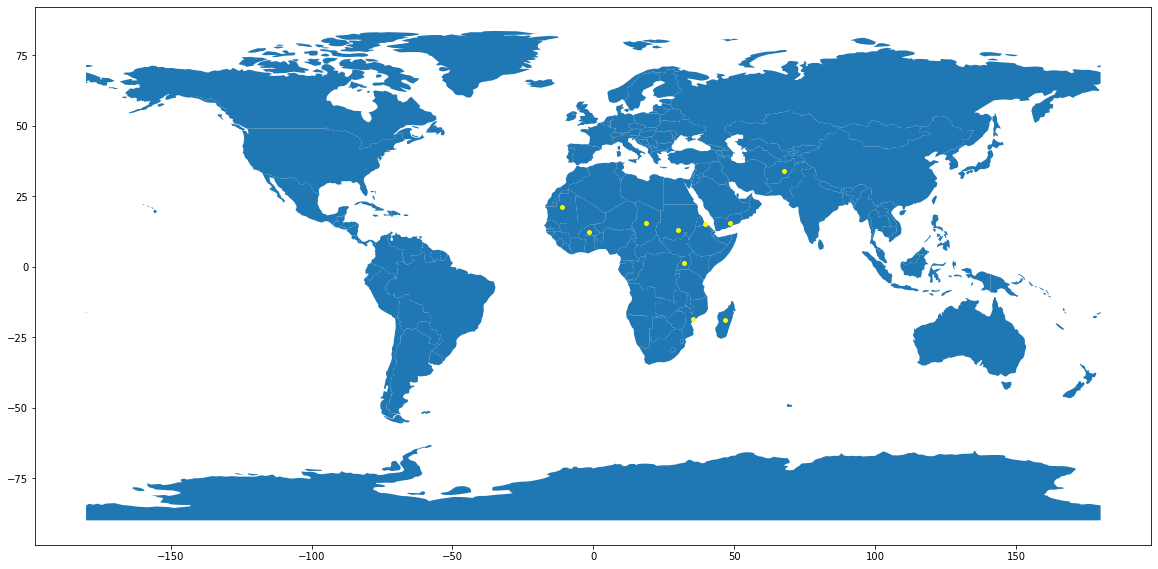

In [98]:
geometry = [Point(xy) for xy in zip(need_ref_cord['longitude'], need_ref_cord['latitude'])]
gdf = GeoDataFrame(need_ref_cord, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker='o', color='yellow', markersize=15);


In [99]:
gdf.head()

country   latitude  longitude  Fertility_Rate  Child_Mortality_Rate  \
0   Mozambique -18.665695  35.529562            0.05                  1.84   
1       Uganda   1.373333  32.290275            0.04                  1.44   
2      Eritrea  15.179384  39.782334            0.04                  1.33   
3  Afghanistan  33.939110  67.709953            0.03                  1.54   
4   Mauritania  21.007890 -10.940835            0.03                  1.53   

                     geometry  
0  POINT (35.52956 -18.66569)  
1    POINT (32.29028 1.37333)  
2   POINT (39.78233 15.17938)  
3   POINT (67.70995 33.93911)  
4  POINT (-10.94083 21.00789)

In [100]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [101]:
world_country=world

In [102]:
world_country.rename(columns={'name':'country'},inplace=True)

In [103]:
world_country.head()

pop_est      continent                   country iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

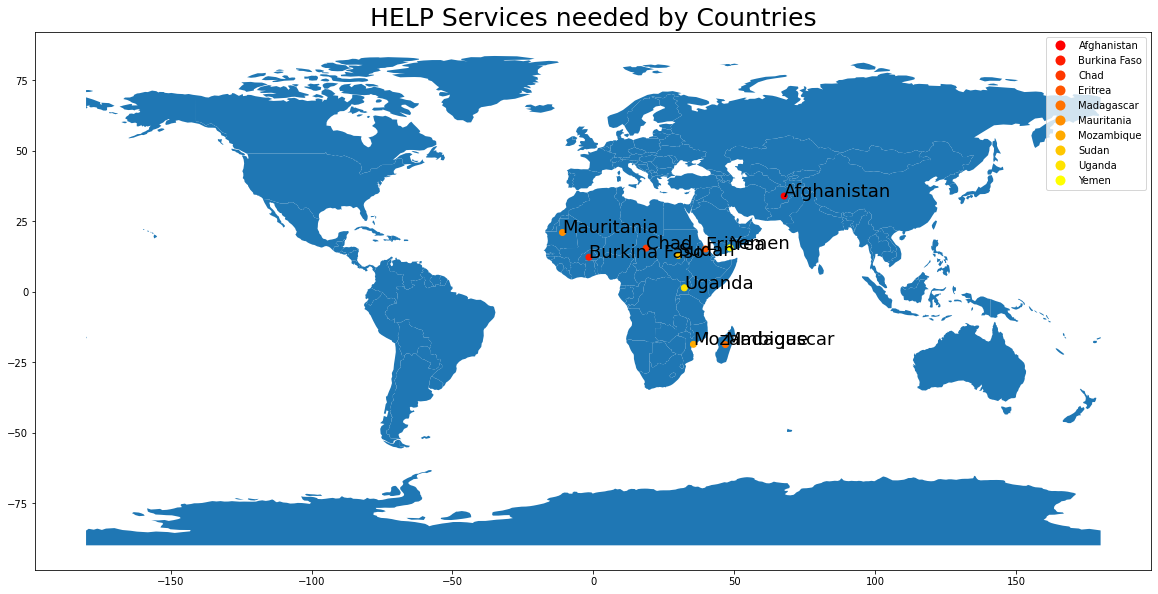

In [104]:
# merge gdf data and world_country
world_merge=world_country.merge(gdf,on='country') 
geometry = [Point(xy) for xy in zip(world_merge['longitude'], world_merge['latitude'])]
gdf = GeoDataFrame(world_merge, geometry=geometry)
gdf.plot(ax=world.plot(figsize=(20, 30)),column='country', figsize=(35,40),legend=True,cmap='autumn')

for i in range(len(world_merge)):
    plt.text(world_merge.longitude[i],world_merge.latitude[i],"{}".format(world_merge.country[i]),size=18)
plt.title('HELP Services needed by Countries',fontsize=25)

plt.savefig('world.png',bbox_inches="tight")
#******************************************************************************************************************
# fig, ax = plt.subplots()
# mpld3.save_html(fig,"C:/Users/MahaGaNapathi/Downloads/LIVE/HELP-NGO-Clustering/test-klop.html")

# import base64
# import mpld3
# import io
# from io import BytesIO

# data_uri = base64.b64encode(open('world.png', 'rb').read()).decode('utf-8')
# img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
# #print(img_tag)

# with open('gert.html','w') as f:
#     f.write(img_tag)

#********************************************************************************************************************
    
# import base64
# import io

# #fig = plt.figure(figsize=(100,800))
# #fig=plt.figure()

# pngImage = io.BytesIO()
# FigureCanvas(fig).print_png(pngImage) 

# # Encode PNG image to base64 string
# image = "data:image/png;base64,"
# image += base64.b64encode(pngImage.getvalue()).decode('utf8')
    
# #img_tag = '<img src="data:image/png;base64,{0}">'.format(image)
# # # #print(img_tag)

# with open('yhjkn.html','w') as f:
#     f.write(img_tag)    
#*****************************************************************************************************************    

# import matplotlib.ticker as tkr

# fig, ax = plt.subplots()

# path = 'C:/Users/MahaGaNapathi/Downloads/LIVE/HELP-NGO-Clustering/world.png'
# im = plt.imread(path)
# ax.imshow(im)

# ax.axis("off")
# ax.xaxis.set_major_locator(tkr.NullLocator())
# ax.yaxis.set_major_locator(tkr.NullLocator())

# fig.savefig('C:/Users/MahaGaNapathi/Downloads/LIVE/HELP-NGO-Clustering/world-saved.jpg',
#                bbox_inches="tight", pad_inches=0.0)
# plt.show()
# plt.close()
#**********************************************************************************************************

plt.show()

In [105]:
need_ref_cord_all.head()

country   latitude  longitude  Fertility_Rate  Child_Mortality_Rate
0   Mozambique -18.665695  35.529562            0.05                  1.84
1       Uganda   1.373333  32.290275            0.04                  1.44
2      Eritrea  15.179384  39.782334            0.04                  1.33
3  Afghanistan  33.939110  67.709953            0.03                  1.54
4   Mauritania  21.007890 -10.940835            0.03                  1.53

In [106]:
need_ref_cord_all_no_country=need_ref_cord_all.iloc[:,1:]

In [107]:
need_ref_cord_all_no_country.head()

latitude  longitude  Fertility_Rate  Child_Mortality_Rate
0 -18.665695  35.529562            0.05                  1.84
1   1.373333  32.290275            0.04                  1.44
2  15.179384  39.782334            0.04                  1.33
3  33.939110  67.709953            0.03                  1.54
4  21.007890 -10.940835            0.03                  1.53

In [108]:
# final model with k=4
kmns = KMeans(n_clusters=4, max_iter=50)
kmns.fit(need_ref_cord_all_no_country)

KMeans(max_iter=50, n_clusters=4)

In [109]:
kmns.labels_

array([3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 1, 2, 3, 3, 0,
       0, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 0, 1, 3, 3, 1, 0, 3, 1, 3,
       0, 0, 3, 0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 3, 2, 3, 0, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 3, 0, 3, 2,
       1, 2, 3, 0, 1, 0, 2, 1, 0, 2, 3, 2, 0, 2, 0, 1, 0, 2, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 3, 0, 3, 0, 3, 0, 0, 1, 0,
       0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 0, 2, 2, 3])

In [110]:
# assign the label
need_ref_cord_all_no_country['cluster_labels'] = kmns.labels_
need_ref_cord_all_no_country.head()

latitude  longitude  Fertility_Rate  Child_Mortality_Rate  cluster_labels
0 -18.665695  35.529562            0.05                  1.84               3
1   1.373333  32.290275            0.04                  1.44               3
2  15.179384  39.782334            0.04                  1.33               3
3  33.939110  67.709953            0.03                  1.54               3
4  21.007890 -10.940835            0.03                  1.53               0

In [111]:
need_ref_cord_country_lat=need_ref_cord_all[['country','latitude']]

In [112]:
need_ref_final=need_ref_cord_country_lat.merge(need_ref_cord_all_no_country, on='latitude')

In [113]:
need_ref_final.head()

country   latitude  longitude  Fertility_Rate  Child_Mortality_Rate  \
0   Mozambique -18.665695  35.529562            0.05                  1.84   
1       Uganda   1.373333  32.290275            0.04                  1.44   
2      Eritrea  15.179384  39.782334            0.04                  1.33   
3  Afghanistan  33.939110  67.709953            0.03                  1.54   
4   Mauritania  21.007890 -10.940835            0.03                  1.53   

   cluster_labels  
0               3  
1               3  
2               3  
3               3  
4               0

In [114]:
need_ref_final.sort_values(by=['Child_Mortality_Rate'], ascending=False).head(10)

country   latitude  longitude  Fertility_Rate  Child_Mortality_Rate  \
0     Mozambique -18.665695  35.529562            0.05                  1.84   
18         Haiti  18.971187 -72.285215            0.01                  1.71   
3    Afghanistan  33.939110  67.709953            0.03                  1.54   
4     Mauritania  21.007890 -10.940835            0.03                  1.53   
1         Uganda   1.373333  32.290275            0.04                  1.44   
5   Burkina Faso  12.238333  -1.561593            0.03                  1.37   
2        Eritrea  15.179384  39.782334            0.04                  1.33   
6     Madagascar -18.766947  46.869107            0.03                  1.32   
8           Chad  15.454166  18.732207            0.02                  1.07   
7          Sudan  12.862807  30.217636            0.03                  1.02   

    cluster_labels  
0                3  
18               2  
3                3  
4                0  
1                3  
5                0  
2                3  
6                3  
8                3  
7                3

In [115]:
country_clusters=need_ref_final[['country']]

In [116]:
country_clusters=country_clusters.head(10)
country_clusters

country
0    Mozambique
1        Uganda
2       Eritrea
3   Afghanistan
4    Mauritania
5  Burkina Faso
6    Madagascar
7         Sudan
8          Chad
9         Yemen

In [117]:
country_html=country_clusters.to_html()


#write html to file
text_file = open("index.html", "w")
text_file.write(country_html)
text_file.close()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>country</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Mozambique</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Uganda</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Eritrea</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Afghanistan</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Mauritania</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Burkina Faso</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Madagascar</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>Sudan</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>Chad</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>Yemen</td>\n    </tr>\n  </tbody>\n</table>'

In [118]:
# import base64
# import mpld3
# import io
# from io import BytesIO
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# plt.savefig('world.png')
# plot sth
# mpld3.fig_to_html(fig)
# with open('test.html','w') as f:
#     f.write(html)
#****************************************************************************************************************

# pngImage = io.BytesIO()
# FigureCanvas(fig).print_png(pngImage) #fig is my matPlotlib instance of Figure()

# # Encode PNG image to base64 string
# image = "C:\\Users\\MahaGaNapathi\\Downloads\\LIVE\\HELP-NGO-Clustering\\world.png;base64,"
# image += base64.b64encode(pngImage.getvalue()).decode('utf8')

# # data_uri = base64.b64encode(open('world.png', 'rb').read()).decode('utf-8')
# # img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
# # #print(img_tag)

# with open('test.html','w') as f:
#     f.write(img_tag)

In [119]:
# tmpfile = io.BytesIO()
# #image=fig.savefig(tmpfile, format='png',bbox_inches='tight')
# encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

# html ='<img src=\'C:\\Users\\MahaGaNapathi\\Downloads\\LIVE\\HELP-NGO-Clustering\\world.png;base64,{}\>'.format(encoded) 

# with open('opytest.html','w') as f:
#     f.write(html)

In [120]:
# import io
# import base64
# from io import BytesIO

# def fig_to_base64(fig):
#     img = io.BytesIO()
#     fig.savefig(img, format='png',
#                 bbox_inches='tight')
#     img.seek(0)

#     return base64.b64encode(img.getvalue())

# encoded = fig_to_base64(fig)
# my_html = '<img src="data:image/png;base64, {}">'.format(encoded.decode('utf-8'))

# with open('my_html.html','w') as f:
#      f.write(my_html)

In [121]:
import plotly.express as pe
import plotly.graph_objects as go



fig = go.Figure(data=go.Choropleth(
    locations=choro_ref['country'], 
    z = choro_ref['Child_Mortality_Rate'].astype(float), 
    locationmode = 'country names', 
    colorscale = 'RdYlBu',
    colorbar_title = "African Countries",
    hovertext='country'
))

fig.update_layout(
    title_text = 'Situation in Africa',
    geo_scope='africa',
)
fig.show()

In [122]:

fig = go.Figure(data=go.Choropleth(
    locations=choro_ref['country'], 
    z = choro_ref['Child_Mortality_Rate'].astype(float), 
    locationmode = 'country names', 
    colorscale = 'RdYlBu',
    colorbar_title = "Child Mortality Rate",
    hovertext='Child Mortality Rate'
))

fig.update_layout(
    title_text = 'Situation in Afro-Asian Countries',
    geo_scope='world',
)
fig.show()

## Result

#### HELP-NGO needs to concentrate on following top 10 countries

In [123]:
for i in range(country_clusters.shape[0]):
    print('*',country_clusters.country[i])

* Mozambique
* Uganda
* Eritrea
* Afghanistan
* Mauritania
* Burkina Faso
* Madagascar
* Sudan
* Chad
* Yemen


## Saving the Model

In [124]:
import pickle

#dump information to that file
pickle.dump(kmns,open('model.pkl','wb'))

#load a model
pickle.load(open('model.pkl','rb'))

KMeans(max_iter=50, n_clusters=4)